<a href="https://colab.research.google.com/github/deekshithaj/Search-Engine-for-Dogs/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastcluster

In [ ]:
import json
import time
import fastcluster
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

start_time = time.time()

In [ ]:
!pip install multiline

import multiline

  Preparing metadata (setup.py) ... done
  Created wheel for multiline: filename=multiline-1.0.2-py3-none-any.whl size=2621 sha256=20b56f1591b033e33a88ebd89ce65d018dab88ac0cce663ff66ed8d3789d311b
  Stored in directory: /root/.cache/pip/wheels/23/53/ef/fa0fb141b3dcce07a9536876eb1a17b080d94f74ebdafcde69
Successfully built multiline


In [ ]:
# with open("dogs_data.json", "r", encoding="ISO-8859-1") as f:
#   data = json.load(f)
#   # data = multiline.loads(, multiline=True)

with open('dogs_data_multiline.json', 'r', encoding="utf-8") as fp:
    data = multiline.load(fp, multiline=True) #use json.load

# print(data)
document_list = []
url_list = []

# Parse text content from indexed json
for outer_index in data:
    if 'content' in outer_index:
      content = outer_index['content']
      url = outer_index['url']
      url_list.append(url)
      document_list.append(content)

print("Time taken for parsing JSON: ", time.time() - start_time)

print(document_list)
# Use TF-IDF Vectorizer to vectorize document text inputs
vectorizer = TfidfVectorizer(max_df=0.6, min_df=0.1, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(document_list)
print("Time taken for vectorizing inputs: ", time.time() - start_time)

print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Time taken for vectorizing inputs:  1901.6832027435303
  (0, 163)	0.26052537578657514
  (0, 497)	0.18229574003079543
  (0, 143)	0.266876467168735
  (0, 594)	0.24944315371880055
  (0, 389)	0.5699653219508035
  (0, 50)	0.6637690771991109
  (1, 572)	0.028508970713762304
  (1, 578)	0.024667179360398604
  (1, 460)	0.025814682590468603
  (1, 365)	0.016252917649550124
  (1, 47)	0.029461031708133825
  (1, 141)	0.024034237736181196
  (1, 412)	0.027772359004338925
  (1, 200)	0.02548975091214038
  (1, 504)	0.023273959512489457
  (1, 511)	0.02578245756499019
  (1, 547)	0.016447852108842077
  (1, 336)	0.029052410963399423
  (1, 566)	0.026291048979960017
  (1, 265)	0.02748770565931991
  (1, 135)	0.0320578483995896
  (1, 576)	0.01799735332062941
  (1, 269)	0.03290767668403034
  (1, 593)	0.03103837104752322
  (1, 212)	0.033012436633507405
  :	:
  (108507, 546)	0.007397485937937303
  (108507, 610)	0.051323655289730485
  (108507, 201)	0.007619893738486954
  (108507, 423)	0.02101502263564107
  (108507, 4

In [ ]:
# Determine the number of rows to keep (70% of the original)
num_rows_to_keep = int(0.7 * X.shape[0])

# Slice the matrix to keep only the first 70% of the rows
X_70_percent = X[:num_rows_to_keep]

print("Shape of original X:", X.shape)
print("Shape of X with 70% of the data:", X_70_percent.shape)

Shape of original X: (108508, 645)
Shape of X with 70% of the data: (75955, 645)


In [ ]:
max_iter = 100
inertia = []
for i in range(2, 30):  # Try different k values from 2 to 13
    print(f"Cluster {i} is started")
    kmeans = KMeans(n_clusters=i,max_iter=max_iter, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    print(f"Cluster {i} is done")


Cluster 2 is started


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 2 is done
Cluster 3 is started
Cluster 3 is done
Cluster 4 is started
Cluster 4 is done
Cluster 5 is started
Cluster 5 is done
Cluster 6 is started
Cluster 6 is done
Cluster 7 is started
Cluster 7 is done
Cluster 8 is started
Cluster 8 is done
Cluster 9 is started
Cluster 9 is done
Cluster 10 is started
Cluster 10 is done
Cluster 11 is started
Cluster 11 is done
Cluster 12 is started
Cluster 12 is done
Cluster 13 is started
Cluster 13 is done
Cluster 14 is started
Cluster 14 is done
Cluster 15 is started
Cluster 15 is done
Cluster 16 is started
Cluster 16 is done
Cluster 17 is started
Cluster 17 is done
Cluster 18 is started
Cluster 18 is done
Cluster 19 is started
Cluster 19 is done
Cluster 20 is started
Cluster 20 is done
Cluster 21 is started
Cluster 21 is done
Cluster 22 is started
Cluster 22 is done
Cluster 23 is started
Cluster 23 is done
Cluster 24 is started
Cluster 24 is done
Cluster 25 is started
Cluster 25 is done
Cluster 26 is started
Cluster 26 is done
Cluster 27 i

Plotting the elbow graph 


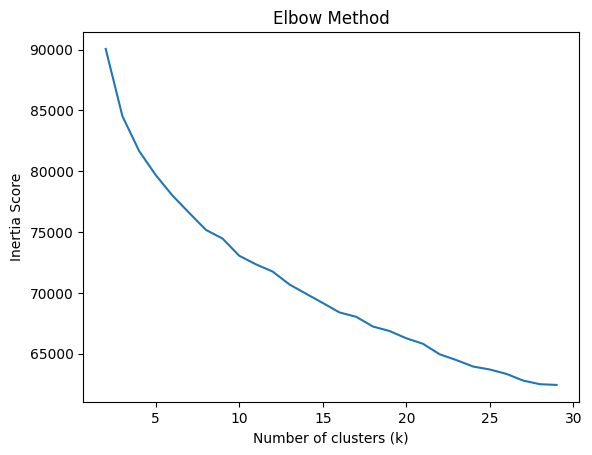

In [ ]:
print("Plotting the elbow graph ")
plt.plot(range(2,30,1), inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')
plt.savefig(f"/content/elbow.png")
plt.show()

In [ ]:

# Apply flat clustering (K-means)
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
km.fit(X)
# print("Time taken for applying flat clustering: ", time.time() - start_time)

# Store K-means clustering results in a file
id_series = pd.Series(url_list)
cluster_series = pd.Series(km.labels_)
results = (pd.concat([id_series,cluster_series], axis=1))
results.columns = ['id', 'cluster']
results.to_csv("clustering_f.txt", sep=',', columns=['id', 'cluster'], header=False, index=False, encoding='utf-8')
print("Time taken for storing results of flat clustering: ", time.time() - start_time)

# Apply Hierarchical Clustering (Single link)
# dist = 1 - cosine_similarity(X)
# print("Time taken for computing cosine similarity: ", time.time() - start_time)

# agg_d = fastcluster.linkage(dist, method='single', metric='euclidean')
# print("Time taken for single linkage: ", time.time() - start_time)

# fig, ax = plt.subplots()
# ax = dendrogram(fastcluster.single(agg_d), orientation="right", labels=url_list)
# print("Time taken for applying hierarchical clustering: ", time.time() - start_time)


NameError: name 'X' is not defined

In [ ]:
print(X_70_percent)

print(X.shape)

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the number of dimensions you want to reduce to
num_dimensions = 3  # You can choose any desired number

# Perform Truncated SVD to reduce dimensions
svd = TruncatedSVD(n_components=num_dimensions)
X_reduced = svd.fit_transform(X)

print("Original shape of X:", X.shape)
print("Reduced shape of X:", X_reduced.shape)

NameError: name 'X_70_percent' is not defined

In [ ]:
#starting ---

# # Use TF-IDF Vectorizer to vectorize document text inputs
# vectorizer = TfidfVectorizer(max_df=0.6, min_df=0.1, stop_words='english', use_idf=True)
# X = vectorizer.fit_transform(document_list)
# print("Time taken for vectorizing inputs: ", time.time() - start_time)

# print(X)

import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have defined document_list and imported necessary libraries

# Shuffle the indices of document_list
np.random.shuffle(document_list)

# Define the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.6, min_df=0.1, stop_words='english', use_idf=True)

# Fit the vectorizer to the shuffled data and transform it into TF-IDF matrix
X = vectorizer.fit_transform(document_list)

# Determine the number of rows to keep (70% of the original)
num_rows_to_keep = int(0.7 * X.shape[0])

# Shuffle the indices of the rows of X
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Select the first 70% of the shuffled rows
selected_indices = indices[:num_rows_to_keep]
X_70_percent = X[selected_indices]

# Define the number of dimensions you want to reduce to
num_dimensions = 3  # You can choose any desired number

# Perform Truncated SVD to reduce dimensions
svd = TruncatedSVD(n_components=num_dimensions)
X_70_percent_reduced = svd.fit_transform(X_70_percent)

print("Original shape of X:", X.shape)
print("Shape of 70% of X:", X_70_percent.shape)
print("Reduced shape of 70% of X:", X_70_percent_reduced.shape)



Original shape of X: (108508, 645)
Shape of 70% of X: (75955, 645)
Reduced shape of 70% of X: (75955, 3)


In [ ]:
print(X_70_percent_reduced.shape[0])
print(X_70_percent_reduced)

75955
[[ 0.13588286  0.00208157  0.15341571]
 [ 0.47130105 -0.20807398 -0.27814311]
 [ 0.2481963   0.0398396   0.2431981 ]
 ...
 [ 0.22098597 -0.00278458  0.23121766]
 [ 0.59930551 -0.1840774  -0.10057149]
 [ 0.61282216 -0.25158833 -0.19674525]]


In [ ]:
#adding extra row

In [ ]:
import numpy as np

# Assuming X is your existing dataset
X_new = np.array([[ 0.13588286,  0.00208157,  0.15341571],
                  [ 0.47130105, -0.20807398, -0.27814311],
                  [ 0.2481963,   0.0398396,   0.2431981 ]
              # Add more rows as needed
              ])

# Calculate mean and standard deviation of X along each feature (column)
mean = np.mean(X_new, axis=0)
std_dev = np.std(X_new, axis=0)

# Generate a new entry with values similar to X
new_entry = np.random.normal(loc=mean, scale=std_dev, size=(1, X_new.shape[1]))

# Print the new entry
print("New entry with values similar to X:")
print(new_entry)

New entry with values similar to X:
[[0.34930456 0.04273475 0.16708327]]


In [ ]:
# Add the new entry to X
X_with_new_entry = np.vstack((X_70_percent_reduced, new_entry))

# Print the updated X
print("Updated X with the new entry:")
print(X_with_new_entry)
print(X_with_new_entry.shape)

Updated X with the new entry:
[[ 0.13588286  0.00208157  0.15341571]
 [ 0.47130105 -0.20807398 -0.27814311]
 [ 0.2481963   0.0398396   0.2431981 ]
 ...
 [ 0.59930551 -0.1840774  -0.10057149]
 [ 0.61282216 -0.25158833 -0.19674525]
 [ 0.34930456  0.04273475  0.16708327]]
(75956, 3)


In [ ]:
selected_urls = [url_list[x] for x in selected_indices]
print(len(selected_urls))

75955


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [ ]:
#don't execute this

# Apply Hierarchical Clustering (Single link)
dist = 1 - cosine_similarity(X_70_percent_reduced)
print("Time taken for computing cosine similarity: ", time.time() - start_time)

NameError: name 'cosine_similarity' is not defined

In [ ]:
print(agg_d.shape)
print(len(selected_urls))

print(agg_d.shape[0] + 1 != len(selected_urls))

(75954, 4)
75955
False


In [ ]:
Z = np.asarray(agg_d, order='c')
print(Z.shape)
print(Z.shape[0] + 1 != len(selected_urls))

(75954, 4)
False


In [ ]:
F=fastcluster.single(agg_d)
print(F.shape)
print(F.shape[0] + 1 != len(selected_urls))

(75953, 4)
True


In [ ]:
import sys
sys.setrecursionlimit(10000)

Time taken for single linkage:  7448.812889099121
(75955, 4)
(75954, 4)
75955
False
Time taken for applying hierarchical clustering:  7667.998560428619
Time taken for getting labels:  7668.005343675613


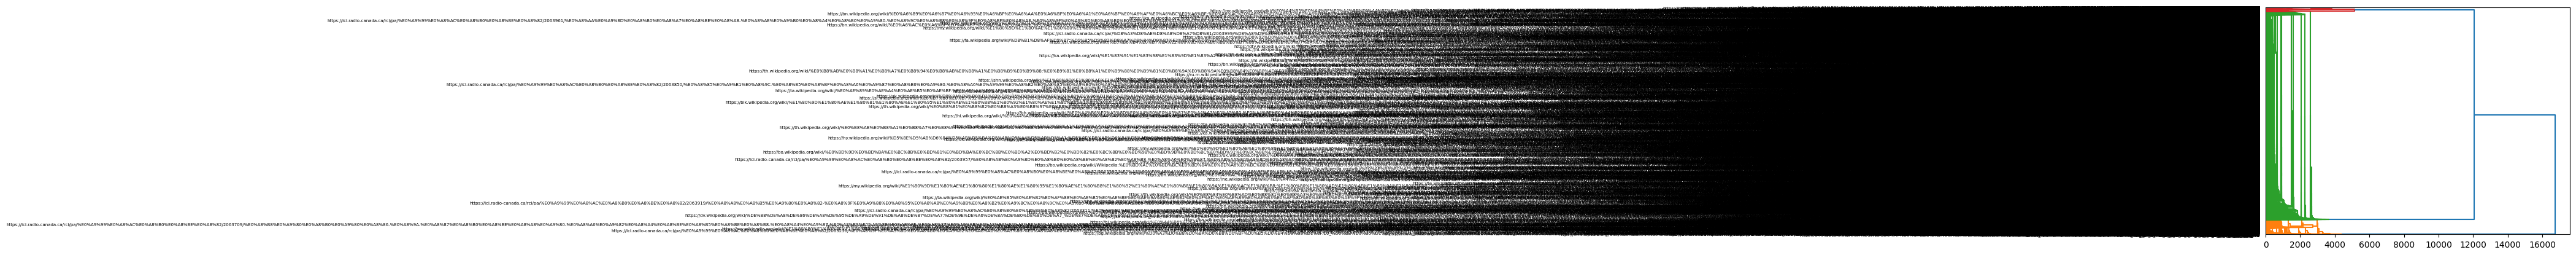

In [ ]:
agg_d = fastcluster.linkage(X_with_new_entry, method='single', metric='euclidean')
print("Time taken for single linkage: ", time.time() - start_time)

print(agg_d.shape)
fig, ax = plt.subplots()

Z = fastcluster.single(agg_d)
print(Z.shape)
print(len(selected_urls))
print(Z.shape[0] + 1 != len(selected_urls))

ax = dendrogram(Z, orientation="right", labels=selected_urls)
print("Time taken for applying hierarchical clustering: ", time.time() - start_time)

# Get labels
for key in ax:
    if key == "ivl":
        hc_key = ax[key]
    if key == "color_list":
        hc_dict = dict([(y,x+1) for x,y in enumerate(sorted(set(ax[key])))])
        hc_value = [hc_dict[x] for x in ax[key]]
print("Time taken for getting labels: ", time.time() - start_time)


In [ ]:
# Store hierarchical clustering results in a file
hc_cluster_series = pd.Series(hc_value)
hc_id_series = pd.Series(hc_key)
hc_results = (pd.concat([hc_id_series, hc_cluster_series], axis=1))
hc_results.columns = ['id', 'cluster']
hc_results.to_csv("clustering_h_single.txt", sep=',', columns=['id', 'cluster'], header=False, index=False, encoding='utf-8')

print("Time taken for storing results of hierarchical clustering: ", time.time() - start_time)

Time taken for storing results of hierarchical clustering:  10268.717319726944


Time taken for single linkage:  11166.682298898697
(75955, 4)
(75954, 4)
75955
False
Time taken for applying hierarchical clustering:  11429.390910863876
Time taken for getting labels:  11429.39777970314


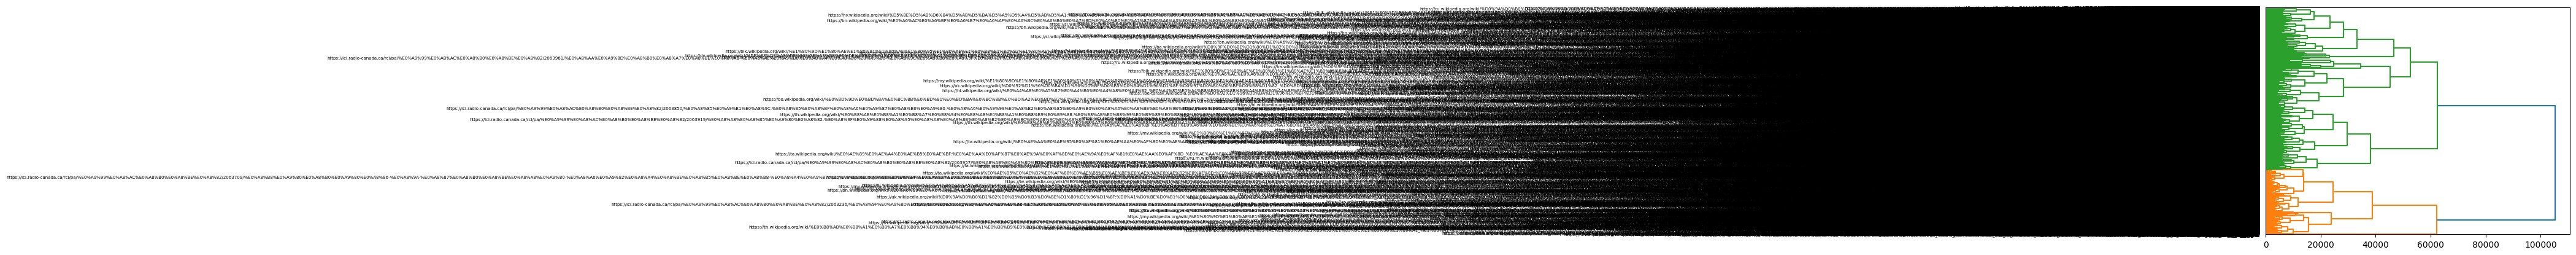

In [ ]:
agg_d_av = fastcluster.linkage(X_with_new_entry, method='average', metric='euclidean')
print("Time taken for average linkage: ", time.time() - start_time)

print(agg_d_av.shape)
fig_av, ax_av = plt.subplots()
# Remove one label from selected_urls

# if len(selected_urls) > 0:
#     selected_urls.pop()  # Remove the last label

Z = fastcluster.average(agg_d_av)
print(Z.shape)
print(len(selected_urls))
print(Z.shape[0] + 1 != len(selected_urls))

ax_av = dendrogram(Z, orientation="right", labels=selected_urls)
print("Time taken for applying hierarchical clustering: ", time.time() - start_time)

# Get labels
for key in ax_av:
    if key == "ivl":
        hc_key_av = ax_av[key]
    if key == "color_list":
        hc_dict_av = dict([(y,x+1) for x,y in enumerate(sorted(set(ax_av[key])))])
        hc_value_av = [hc_dict_av[x] for x in ax_av[key]]
print("Time taken for getting labels: ", time.time() - start_time)


In [ ]:
# Store hierarchical clustering results in a file
hc_cluster_series_av = pd.Series(hc_value_av)
hc_id_series_av = pd.Series(hc_key_av)
hc_results_av = (pd.concat([hc_id_series_av, hc_cluster_series_av], axis=1))
hc_results_av.columns = ['id', 'cluster']
hc_results_av.to_csv("clustering_h_average.txt", sep=',', columns=['id', 'cluster'], header=False, index=False, encoding='utf-8')

print("Time taken for storing results of hierarchical clustering: ", time.time() - start_time)

Time taken for storing results of hierarchical clustering:  15412.21765780449


Complete link

Time taken for complete linkage:  21713.571291208267
(75955, 4)
(75954, 4)
75955
False
Time taken for applying hierarchical clustering:  21996.984419345856
Time taken for getting labels:  21996.991393327713


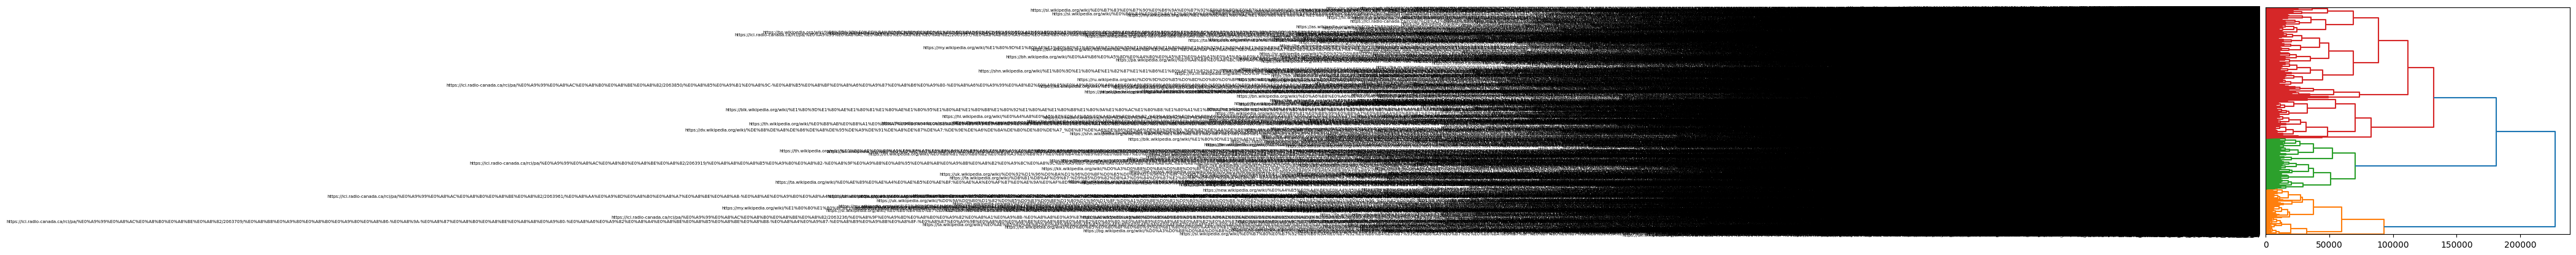

In [ ]:
agg_d_c = fastcluster.linkage(X_with_new_entry, method='complete', metric='euclidean')
print("Time taken for complete linkage: ", time.time() - start_time)

print(agg_d_c.shape)
fig_c, ax_c = plt.subplots()
# Remove one label from selected_urls

# if len(selected_urls) > 0:
#     selected_urls.pop()  # Remove the last label

Z = fastcluster.complete(agg_d_c)
print(Z.shape)
print(len(selected_urls))
print(Z.shape[0] + 1 != len(selected_urls))

ax_c = dendrogram(Z, orientation="right", labels=selected_urls)
print("Time taken for applying hierarchical clustering: ", time.time() - start_time)

# Get labels
for key in ax_c:
    if key == "ivl":
        hc_key_c = ax_c[key]
    if key == "color_list":
        hc_dict_c = dict([(y,x+1) for x,y in enumerate(sorted(set(ax_c[key])))])
        hc_value_c = [hc_dict_c[x] for x in ax_c[key]]
print("Time taken for getting labels: ", time.time() - start_time)


In [ ]:
# Store hierarchical clustering results in a file
hc_cluster_series_c = pd.Series(hc_value_c)
hc_id_series_c = pd.Series(hc_key_c)
hc_results_c = (pd.concat([hc_id_series_c, hc_cluster_series_c], axis=1))
hc_results_c.columns = ['id', 'cluster']
hc_results_c.to_csv("clustering_h_complete.txt", sep=',', columns=['id', 'cluster'], header=False, index=False, encoding='utf-8')

print("Time taken for storing results of hierarchical clustering: ", time.time() - start_time)

Time taken for storing results of hierarchical clustering:  24148.4337747097


 Dimensions 4

In [ ]:
#starting ---

# # Use TF-IDF Vectorizer to vectorize document text inputs
# vectorizer = TfidfVectorizer(max_df=0.6, min_df=0.1, stop_words='english', use_idf=True)
# X = vectorizer.fit_transform(document_list)
# print("Time taken for vectorizing inputs: ", time.time() - start_time)

# print(X)

import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have defined document_list and imported necessary libraries

# Shuffle the indices of document_list
np.random.shuffle(document_list)

# Define the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.6, min_df=0.1, stop_words='english', use_idf=True)

# Fit the vectorizer to the shuffled data and transform it into TF-IDF matrix
X = vectorizer.fit_transform(document_list)

# Determine the number of rows to keep (70% of the original)
num_rows_to_keep = int(0.7 * X.shape[0])

# Shuffle the indices of the rows of X
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Select the first 70% of the shuffled rows
selected_indices_4 = indices[:num_rows_to_keep]
X_70_percent = X[selected_indices_4]

# Define the number of dimensions you want to reduce to
num_dimensions = 4  # You can choose any desired number

# Perform Truncated SVD to reduce dimensions
svd = TruncatedSVD(n_components=num_dimensions)
X_70_percent_reduced_4dim = svd.fit_transform(X_70_percent)

print("Original shape of X:", X.shape)
print("Shape of 70% of X:", X_70_percent.shape)
print("Reduced shape of 70% of X:", X_70_percent_reduced_4dim.shape)


Original shape of X: (108508, 645)
Shape of 70% of X: (75955, 645)
Reduced shape of 70% of X: (75955, 4)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [ ]:
selected_urls_4dim = [url_list[x] for x in selected_indices_4]
print(len(selected_urls_4dim))
print(X_70_percent_reduced_4dim)

75955
[[ 0.51870899 -0.20841408 -0.24451431 -0.01792776]
 [ 0.19224621  0.02905531  0.23607121 -0.00098348]
 [ 0.17728019  0.3379249  -0.0503848   0.5406235 ]
 ...
 [ 0.48609341 -0.11066922 -0.17010955  0.07518157]
 [ 0.45124628  0.47909584 -0.15071088 -0.11860671]
 [ 0.54014164 -0.17520115 -0.14911057 -0.02080289]]


In [ ]:
import numpy as np

# Assuming X is your existing dataset
X = np.array([
    [0.51870899, -0.20841408, -0.24451431, -0.01792776],
    [0.19224621,  0.02905531,  0.23607121, -0.00098348],
    [0.17728019,  0.3379249,  -0.0503848,   0.5406235 ],
    # Add more rows as needed
])

# Calculate mean and standard deviation along each feature dimension
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Generate a new entry with values similar to X
new_entry = np.random.normal(loc=mean, scale=std_dev, size=(1, X.shape[1]))

# Print the new entry
print("New entry with values similar to X:")
print(new_entry)

New entry with values similar to X:
[[ 0.17147782 -0.07164749 -0.26386649 -0.10394527]]


In [ ]:
# Add the new entry to X
X_with_new_entry_4dim = np.vstack((X_70_percent_reduced_4dim, new_entry))

# Print the updated X
print("Updated X with the new entry:")
print(X_with_new_entry_4dim)
print(X_with_new_entry_4dim.shape)

Updated X with the new entry:
[[ 0.51870899 -0.20841408 -0.24451431 -0.01792776]
 [ 0.19224621  0.02905531  0.23607121 -0.00098348]
 [ 0.17728019  0.3379249  -0.0503848   0.5406235 ]
 ...
 [ 0.45124628  0.47909584 -0.15071088 -0.11860671]
 [ 0.54014164 -0.17520115 -0.14911057 -0.02080289]
 [ 0.17147782 -0.07164749 -0.26386649 -0.10394527]]
(75956, 4)


Time taken for single linkage:  43500.440657138824
(75955, 4)
(75954, 4)
75955
False
Time taken for applying hierarchical clustering:  43704.23932600021
Time taken for getting labels:  43704.24643945694


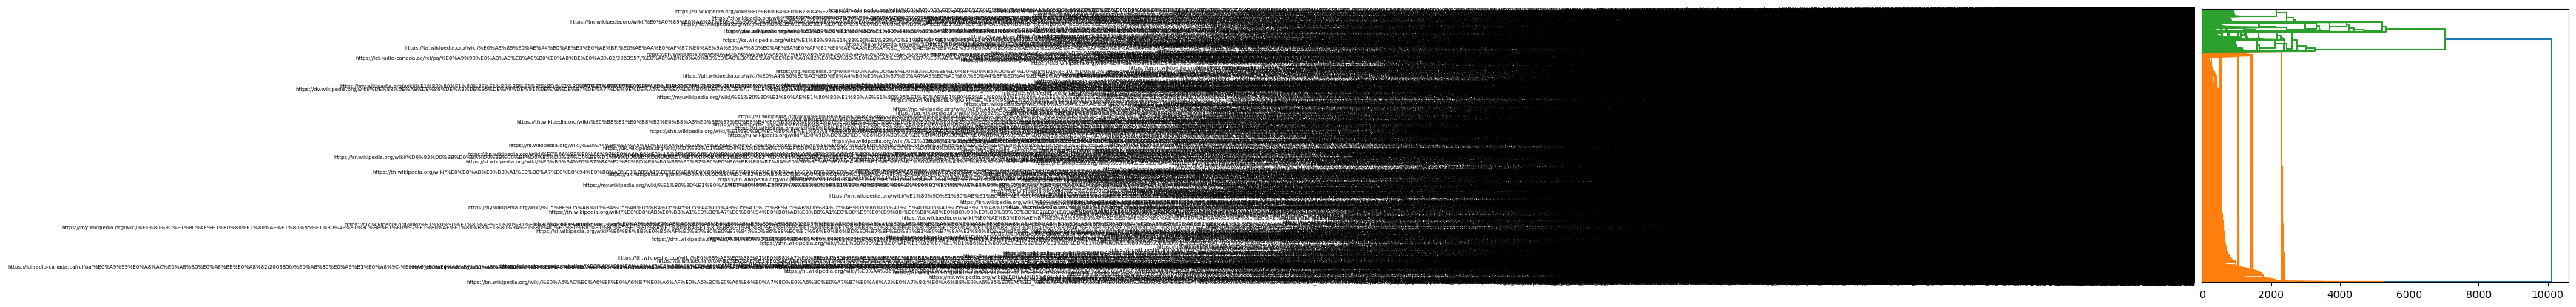

In [ ]:
agg_d_4dim = fastcluster.linkage(X_with_new_entry_4dim, method='single', metric='euclidean')
print("Time taken for single linkage: ", time.time() - start_time)

print(agg_d_4dim.shape)
fig_4dim, ax_4dim = plt.subplots()

Z_4dim = fastcluster.single(agg_d_4dim)
print(Z.shape)
print(len(selected_urls_4dim))
print(Z.shape[0] + 1 != len(selected_urls_4dim))

ax_4dim = dendrogram(Z_4dim, orientation="right", labels=selected_urls_4dim)
print("Time taken for applying hierarchical clustering: ", time.time() - start_time)

# Get labels
for key in ax_4dim:
    if key == "ivl":
        hc_key_4dim = ax_4dim[key]
    if key == "color_list":
        hc_dict_4dim = dict([(y,x+1) for x,y in enumerate(sorted(set(ax_4dim[key])))])
        hc_value_4dim = [hc_dict_4dim[x] for x in ax_4dim[key]]
print("Time taken for getting labels: ", time.time() - start_time)


In [ ]:
# Store hierarchical clustering results in a file
hc_cluster_series_4dim = pd.Series(hc_value_4dim)
hc_id_series_4dim = pd.Series(hc_key_4dim)
hc_results_4dim = (pd.concat([hc_id_series_4dim, hc_cluster_series_4dim], axis=1))
hc_results_4dim.columns = ['id', 'cluster']
hc_results_4dim.to_csv("clustering_h_4dim_single.txt", sep=',', columns=['id', 'cluster'], header=False, index=False, encoding='utf-8')

print("Time taken for storing results of single hierarchical clustering: ", time.time() - start_time)

Time taken for storing results of single hierarchical clustering:  45373.32607650757


Time taken for complete linkage:  45958.94389009476
(75955, 4)
(75954, 4)
75955
False
Time taken for applying hierarchical clustering:  46233.95836544037
Time taken for getting labels:  46233.96570849419


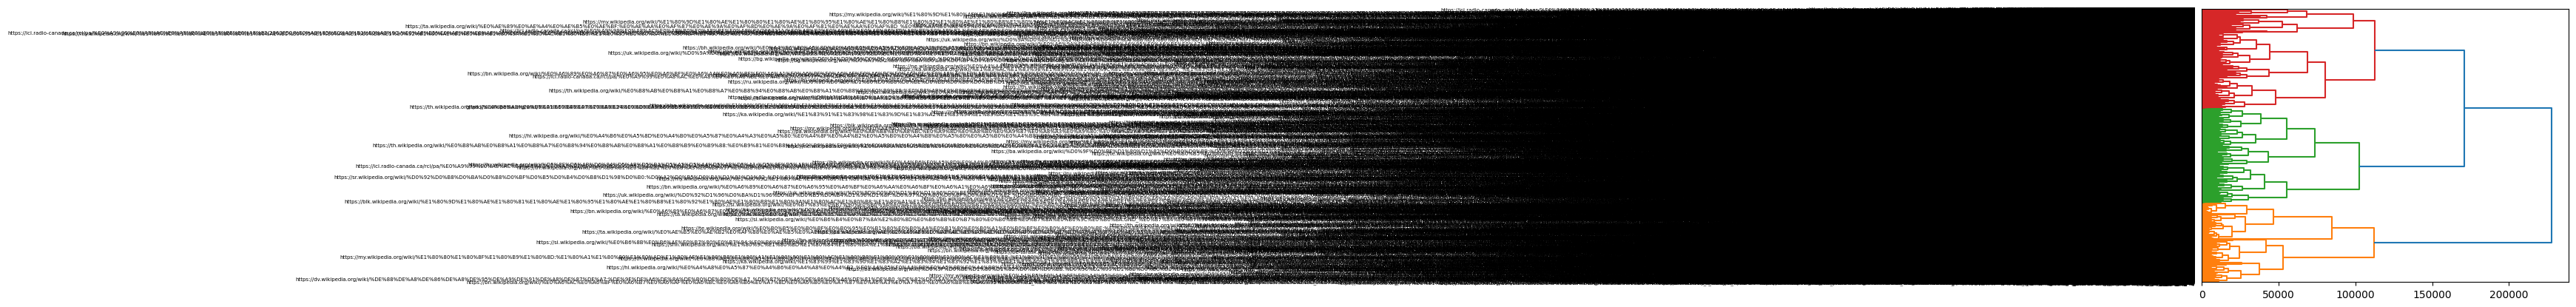

In [ ]:
agg_d_4dim_c = fastcluster.linkage(X_with_new_entry_4dim, method='complete', metric='euclidean')
print("Time taken for complete linkage: ", time.time() - start_time)

print(agg_d_4dim_c.shape)
fig_4dim_c, ax_4dim_c = plt.subplots()

Z_4dim_c = fastcluster.complete(agg_d_4dim_c)
print(Z.shape)
print(len(selected_urls_4dim))
print(Z.shape[0] + 1 != len(selected_urls_4dim))

ax_4dim_c = dendrogram(Z_4dim_c, orientation="right", labels=selected_urls_4dim)
print("Time taken for applying hierarchical clustering: ", time.time() - start_time)

# Get labels
for key in ax_4dim_c:
    if key == "ivl":
        hc_key_4dim_c = ax_4dim_c[key]
    if key == "color_list":
        hc_dict_4dim_c = dict([(y,x+1) for x,y in enumerate(sorted(set(ax_4dim_c[key])))])
        hc_value_4dim_c = [hc_dict_4dim_c[x] for x in ax_4dim_c[key]]
print("Time taken for getting labels: ", time.time() - start_time)


In [ ]:
# Store hierarchical clustering results in a file
hc_cluster_series_4dim_c = pd.Series(hc_value_4dim_c)
hc_id_series_4dim_c = pd.Series(hc_key_4dim_c)
hc_results_4dim_c = (pd.concat([hc_id_series_4dim_c, hc_cluster_series_4dim_c], axis=1))
hc_results_4dim_c.columns = ['id', 'cluster']
hc_results_4dim_c.to_csv("clustering_h_4dim_complete.txt", sep=',', columns=['id', 'cluster'], header=False, index=False, encoding='utf-8')

print("Time taken for storing results of complete hierarchical clustering: ", time.time() - start_time)

Time taken for storing results of complete hierarchical clustering:  49470.4628431797


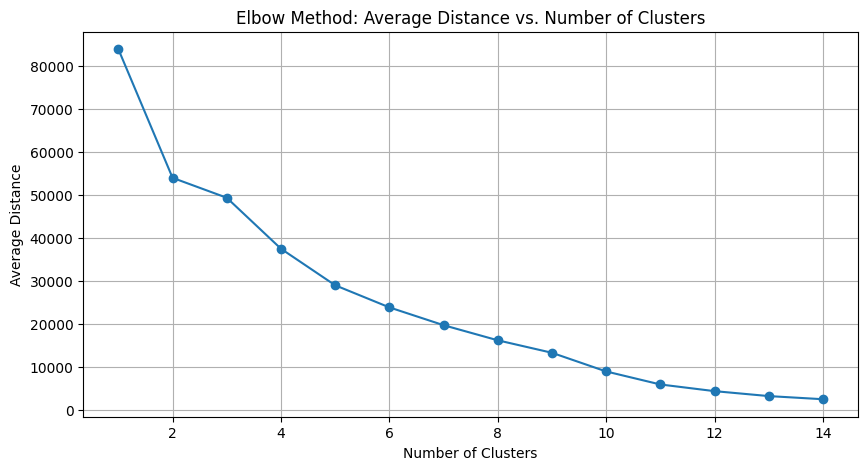

In [ ]:
def find_optimal_clusters(dendrogram, max_clusters=None):
    heights = dendrogram['dcoord']
    if max_clusters is None:
        max_clusters = len(heights) + 1  # Use all possible clusters
    avg_distances = []
    for k in range(1, max_clusters):
        avg_distances.append(np.mean(heights[-k]))
    return avg_distances

# Get the average distances for different numbers of clusters
avg_distances = find_optimal_clusters(ax_av, max_clusters=15)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(avg_distances) + 1), avg_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Elbow Method: Average Distance vs. Number of Clusters')
plt.savefig(f"/content/Eblow_average_dim3.png")
plt.grid(True)
plt.show()